In [174]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import mplcyberpunk
import tqdm
from functions import nth_derivative, oscilador,sol_x

In [175]:
plt.style.use('cyberpunk')
#mplcyberpunk.make_lines_glow()

In [176]:
#5 el intervalo que queremos para x
ti=0.0
tf=10.0
t=torch.linspace(ti,tf,120).view(-1,1)

# x0_i=-0.5
# x0_f=0.6

# v0_i=0.0
# v0_f=0.6

# delta_i=0.0
# delta_f=0.3

# omega_i=0.0
# omega_f=0.3

# T=torch.cartesian_prod(torch.linspace(ti,tf,100),
#                        torch.arange(x0_i,x0_f,0.1))
#                      #   torch.arange(x0_i,x0_f,0.1))
#                     #    torch.linspace(delta_i,delta_f,8),
#                     #    torch.linspace(omega_i,omega_f,8))

# T=T[torch.randperm(T.shape[0])]

In [177]:
#T.cuda()
t.cuda()

tensor([[ 0.0000],
        [ 0.0840],
        [ 0.1681],
        [ 0.2521],
        [ 0.3361],
        [ 0.4202],
        [ 0.5042],
        [ 0.5882],
        [ 0.6723],
        [ 0.7563],
        [ 0.8403],
        [ 0.9244],
        [ 1.0084],
        [ 1.0924],
        [ 1.1765],
        [ 1.2605],
        [ 1.3445],
        [ 1.4286],
        [ 1.5126],
        [ 1.5966],
        [ 1.6807],
        [ 1.7647],
        [ 1.8487],
        [ 1.9328],
        [ 2.0168],
        [ 2.1008],
        [ 2.1849],
        [ 2.2689],
        [ 2.3529],
        [ 2.4370],
        [ 2.5210],
        [ 2.6050],
        [ 2.6891],
        [ 2.7731],
        [ 2.8571],
        [ 2.9412],
        [ 3.0252],
        [ 3.1092],
        [ 3.1933],
        [ 3.2773],
        [ 3.3613],
        [ 3.4454],
        [ 3.5294],
        [ 3.6134],
        [ 3.6975],
        [ 3.7815],
        [ 3.8655],
        [ 3.9496],
        [ 4.0336],
        [ 4.1176],
        [ 4.2017],
        [ 4.2857],
        [ 4.

In [178]:
t.shape

torch.Size([120, 1])

In [179]:
nodos=32
ANN = nn.Sequential(nn.Linear(1, nodos), nn.Tanh(), nn.Linear(nodos,nodos),
                    #nn.Tanh(), nn.Linear(nodos,nodos),
                    #nn.Tanh(), nn.Linear(nodos,nodos),
                    #nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(),nn.Linear(nodos,1))
print(ANN)


Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): Tanh()
  (4): Linear(in_features=32, out_features=1, bias=True)
)


In [180]:
nth_derivative(ANN, t,2)

tensor([[-7.9488e-03],
        [-2.1691e-02],
        [-3.2613e-02],
        [-4.0928e-02],
        [-4.7032e-02],
        [-5.1408e-02],
        [-5.4538e-02],
        [-5.6832e-02],
        [-5.8594e-02],
        [-6.0002e-02],
        [-6.1115e-02],
        [-6.1903e-02],
        [-6.2271e-02],
        [-6.2104e-02],
        [-6.1290e-02],
        [-5.9747e-02],
        [-5.7440e-02],
        [-5.4382e-02],
        [-5.0631e-02],
        [-4.6287e-02],
        [-4.1474e-02],
        [-3.6334e-02],
        [-3.1014e-02],
        [-2.5655e-02],
        [-2.0385e-02],
        [-1.5317e-02],
        [-1.0543e-02],
        [-6.1331e-03],
        [-2.1371e-03],
        [ 1.4147e-03],
        [ 4.5098e-03],
        [ 7.1502e-03],
        [ 9.3502e-03],
        [ 1.1134e-02],
        [ 1.2531e-02],
        [ 1.3576e-02],
        [ 1.4308e-02],
        [ 1.4764e-02],
        [ 1.4981e-02],
        [ 1.4995e-02],
        [ 1.4841e-02],
        [ 1.4548e-02],
        [ 1.4145e-02],
        [ 1

In [181]:
# def Param(T,net=ANN):
#     out = net(T)
#     b=1-torch.exp(ti-T)

#     #return torch.reshape(T[:,1],out.size()) + b*out
#     return 2.0 +() +b.reshape(out.shape)**2 * out

# def Param(T,net=ANN):
#     #T=[t,x0,v0]
#     b=1-torch.exp(ti-T[:,0])
#     a=(T[:,0]-ti)*T[:,2]
#     #return torch.reshape(T[:,1],out.size()) + b*out
#     return T[:,1].view(-1,1) + a.view(-1,1) + b.view(-1,1)**2*net(T)

# def Param(T,net=ANN):
#     out = net(T)
#     a=(T[:,0]-ti)*1.0
#     b=1-torch.exp(ti-T[:,0])
#     #return torch.reshape(T[:,1],out.size()) + b*out
#     return T[:,1].view(-1,1) +a.view(-1,1) +b.view(-1,1)**2 * out


In [182]:
# Param(T)

In [183]:
# def cost(t):
#     #Dt = nth_derivative(Param, t,1)
#     DDt = nth_derivative(Param, t,2) #las derivadas de orden sup sólo respecto a t
#     #delta = T[:, 3]
#     #delta = delta.view(-1, 1)
#     #omega = T[:, 4]

#     osc = DDt - torch.sin(T[:,0]).view(-1,1)

#     return torch.linalg.norm(osc)
#n=len(T)

def cost(t):
    Dt = nth_derivative(ANN, t,1)
    DDt = nth_derivative(ANN, t,2) #las derivadas de orden sup sólo respecto a t
    #delta = T[:, 3]
    #delta = delta.view(-1, 1)
    #omega = T[:, 4]

    osc = DDt + 1.5*Dt + 9.0*ANN(t)
    #osc = DDt + t[:,3].view(-1,1)*Dt + t[:,4].view(-1,1)*Param(t)
    t0=torch.tensor([[ti]], requires_grad=True)
    v0 = nth_derivative(ANN, t0,1)
    coste = torch.mean(osc**2) + (ANN(t0) - 0.4)**2 + (v0 - 1.0)**2
    #return torch.squeeze(coste) 
    #return torch.sum(torch.pow(osc, 2))
    return coste

In [184]:
t0=torch.tensor([[ti]], requires_grad=True)
nth_derivative(ANN, t0,1)-1.0

tensor([[-0.9127]], grad_fn=<SubBackward0>)

In [185]:
cost(t)

tensor([[1.2245]], grad_fn=<AddBackward0>)

In [193]:
#4 Error and optimizer
learning_rate=0.0001
epocas=2000

#optimizer=torch.optim.SGD(ANN.parameters(),lr=learning_rate,momentum=0.9)
optimizer = torch.optim.Adam(ANN.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adadelta(ANN.parameters(), lr=learning_rate)

Training: 100%|██████████████████████████████████| 2000/2000 [00:13<00:00, 152.43it/s, loss=2.68e-5]


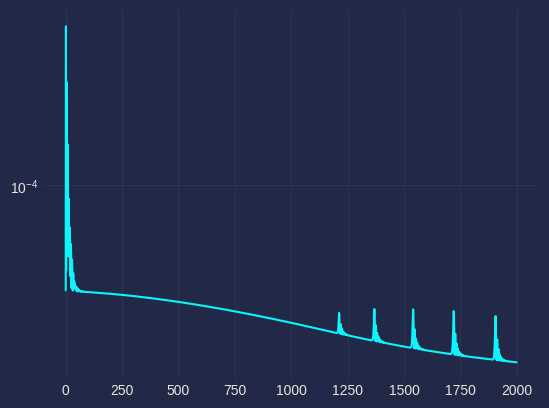

In [194]:
#loop de entrenamiendo 
pbar = tqdm.tqdm(range(epocas), desc="Training",  colour='cyan', ncols=100)

errores=[]
for i in pbar:
    l=cost(t) #coste
    #l=torch.nn.MSELoss(Param(T))
    l.backward() #gradiente
    optimizer.step() #se actualizan los parámetros
    optimizer.zero_grad() #vacíamos el gradiente
    #print('época=%.2f , loss=%.2f'%(i,l))
    errores.append(float(l))
    #tqdm.set_description('época: %d , loss: %.2f' % (i, l.item()))
    pbar.set_postfix({'loss': l.item()})
    #pbar.set_refresh(50)
    #tqdm.set_description("Training")
    #print('época=%.2f , loss=%.2f'%(i,l))

plt.plot(range(epocas),errores)
plt.yscale('log')

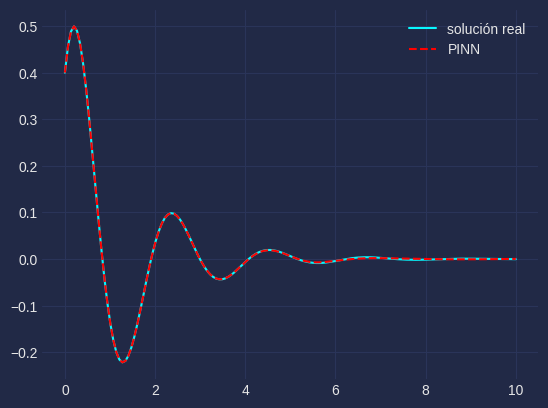

In [195]:
pos_ini=0.4
vel_ini=1.0
d=1.5
omega=3

t1 = torch.linspace(ti,tf,150)
#x0 = pos_ini*torch.ones([t0.shape[0],1])
#v0 = vel_ini*torch.ones([t0.shape[0],1])
# delta0 = d*torch.ones([t0.shape[0],1])
# omega0 = omega*torch.ones([t0.shape[0],1])

#X=torch.cat((t0.view(-1,1),x0),1)
#X.cuda()
#plt.plot(t0, -torch.sin(t0)+2*t0+pos_ini, label='solución real')
plt.plot(t1.detach().numpy(), sol_x([pos_ini,vel_ini], t1, d, omega), label='solución real')
#plt.plot(X[:,0],Param(X).detach().numpy(),'--r', label='PINN')
plt.plot(t1.detach().numpy(),ANN(t1.view(-1,1)).detach().numpy(),'--r', label='PINN')
plt.legend()

In [153]:
%timeit ANN(t).detach().numpy()

125 µs ± 3.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [154]:
%timeit sol_x([pos_ini,vel_ini], t1, d, omega) #odeint

1.31 ms ± 71.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [155]:
1.42e-3/111.0e-6

12.792792792792794

In [156]:
torch.save(ANN.state_dict(),'oscilador_diferente_costo')

In [157]:
ANN.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3717],
                      [-1.1326],
                      [ 0.8250],
                      [-1.1885],
                      [ 2.3386],
                      [-2.5796],
                      [-0.2718],
                      [-0.3820],
                      [-0.4168],
                      [ 1.9987],
                      [-0.0567],
                      [-0.4589],
                      [ 0.1218],
                      [ 0.8684],
                      [ 1.4526],
                      [ 0.0285],
                      [ 0.2964],
                      [ 1.7389],
                      [-0.9218],
                      [ 1.8240],
                      [-0.6996],
                      [ 0.9638],
                      [-2.6355],
                      [ 0.0557],
                      [ 0.2653],
                      [-0.0244],
                      [ 0.4735],
                      [ 1.7293],
                      [-0.3333],
                 